# Data Science Project

<h3>Research Question</h3>
<ol>
<li>A large portion of our dataset appears to contain self-inflicted injuries, suicides, and accidents. How much of our dataset is made up of these values and what do they reveal about distributions of violent crime?</li>
<li>A common argument regarding firearms in the US is that loose gun control laws increase violent crime rates while others claim stricter gun control laws facilitate increased crime rates. Will correlations in our dataset confirm or deviate from either of  these positions?</li>
<li>Another common argument regarding firearms in the US is that liberal/democrat run areas have more firearm incidents than those with conservative/republican leadership. Would this assertion stand a comparison between political leadership and gun violence?</li>
<li>Is there a correlation between location (latitude, longitude, altitude) and gun violence, deaths, or suicides? Disregarding population density, how might data like this affect our first two research questions?</li>
</ol>

<h3>Data Collection & Cleaning</h3>

In [24]:
# Setup
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [25]:
# Smaller dataset but over longer time period
s1 = pd.read_csv("us_shootings_1982-2017.csv")

# Clean up the column names
s1.columns = s1.columns.str.strip().str.lower().str.replace(' ', '_')

# Function to convert string values to numbers
def num_only(val):
    return re.findall(r'[0-9]+', val)[0]

# Formats the gender into 3 distinct options
def clean_gender(val):
    if val == 'Male & Female':
        return 'Both'
    else:
        return val[0].upper()
    
def clean_venue(val):
    return val.replace('\n','')

# clean up some of the columns
s1["fatalities"] = pd.to_numeric(s1["fatalities"].apply(num_only))
s1["injured"] = pd.to_numeric(s1["injured"].apply(num_only))
s1["total_victims"] = pd.to_numeric(s1["total_victims"].apply(num_only))
s1["race"] = s1["race"].str.strip().str.lower()
s1["gender"] = s1["gender"].apply(clean_gender)
s1["venue"] = s1["venue"].apply(clean_venue)

# keep only relevant columns
s1 = s1.drop(columns=['case', 'race', 'gender','summary','sources','where_obtained',
                      'type_of_weapons','mental_health_-_details','mental_health_sources',
                     'weapons_obtained_legally','weapon_details','latitude','longitude'])

# print unique venues
print("Unique Venues: " + str(s1['venue'].unique()))

# display description of data
print('')
print(s1.describe())

# print a preview of the data
s1.head(15)

Unique Venues: ['Religious' 'Other' 'Workplace' 'Airport' 'School' 'Military']

              year  fatalities     injured  total_victims
count    94.000000   94.000000   94.000000      94.000000
mean   2005.521277    8.404255   12.691489      21.095745
std      10.105602    8.529921   50.856329      57.020100
min    1982.000000    3.000000    0.000000       3.000000
25%    1998.000000    5.000000    1.000000       7.000000
50%    2008.500000    6.000000    3.000000      10.500000
75%    2014.000000    8.000000   10.000000      18.000000
max    2017.000000   58.000000  489.000000     547.000000


,location,date,year,fatalities,injured,total_victims,venue,prior_signs_of_mental_health_issues,type
0,"Sutherland Springs, TX",11/5/17,2017,26,20,46,Religious,Yes,Mass
1,"Thornton, CO",11/1/17,2017,3,0,3,Other,Unclear,Mass
2,"Edgewood, MD",10/18/17,2017,3,3,6,Workplace,Unclear,Mass
3,"Las Vegas, NV",10/1/17,2017,58,489,547,Other,TBD,Mass
4,"San Francisco, CA",6/14/17,2017,3,2,5,Workplace,Yes,Mass
5,"Tunkhannock, PA",6/7/17,2017,3,0,3,Workplace,Unclear,Mass
6,"Orlando, Florida",6/5/2017,2017,5,0,5,Workplace,Unclear,Mass
7,"Kirkersville, Ohio",5/12/2017,2017,3,0,3,Workplace,Yes,Mass
8,"Fresno, California",4/18/2017,2017,3,0,3,Other,Unclear,Mass
9,"Fort Lauderdale, Florida",1/6/2017,2017,5,6,11,Airport,Yes,Mass


In [26]:
# very large (250k+ incidents) dataset from https://www.kaggle.com/jameslko/gun-violence-data
# in s2_clean, some unnecessary columns have been removed to reduce size
s2c = pd.read_csv("s2_clean.csv")

# Display description of the data
print(s2c.describe())

# Get total killed and total injured
print("\nTotal killed: " + str(s2c['n_killed'].sum()))
print("Total injured: " + str(s2c['n_injured'].sum()))

s2c_short = s2c.drop(columns=['address', 'location_description', 'longitude', 'latitude'])
s2c_short.head(15)

          Unnamed: 0   incident_id       n_killed      n_injured  \
count  239677.000000  2.396770e+05  239677.000000  239677.000000   
mean   119838.000000  5.593343e+05       0.252290       0.494007   
std     69188.934572  2.931287e+05       0.521779       0.729952   
min         0.000000  9.211400e+04       0.000000       0.000000   
25%     59919.000000  3.085450e+05       0.000000       0.000000   
50%    119838.000000  5.435870e+05       0.000000       0.000000   
75%    179757.000000  8.172280e+05       0.000000       1.000000   
max    239676.000000  1.083472e+06      50.000000      53.000000   

       congressional_district       latitude      longitude  n_guns_involved  \
count           227733.000000  231754.000000  231754.000000    140226.000000   
mean                 8.001265      37.546598     -89.338348         1.372442   
std                  8.480835       5.130763      14.359546         4.678202   
min                  0.000000      19.111400    -171.429000        

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,n_guns_involved,participant_age,participant_age_group,participant_gender,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,NaN
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,62.0,27.0
5,5,478948,2013-01-07,Oklahoma,Tulsa,4,0,1.0,"Shot - Dead (murder, accidental, suicide)||Hom...",NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,72.0,11.0
6,6,479363,2013-01-19,New Mexico,Albuquerque,5,0,1.0,"Shot - Dead (murder, accidental, suicide)||Mas...",2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,10.0,14.0
7,7,479374,2013-01-21,Louisiana,New Orleans,0,5,2.0,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,93.0,5.0
8,8,479389,2013-01-21,California,Brentwood,0,4,9.0,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,11.0,7.0
9,9,492151,2013-01-23,Maryland,Baltimore,1,6,7.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,NaN,44.0


<h3>Data Description</h3>
<ol>
<li><h5>Who was the dataset created by and funded by?</h5></li>
The dataset was collected by a non-profit organization called Gun Violence Archive (GVA) intended to provide public access to accurate information regarding gun related incidents in the USA.
Our particular dataset was assembled by Kaggle user James Ko combining data collected from GVA between 2013 and 2018. Using the location data recorded by GVA, the user has also included the house and senate districts where these incidents have taken place, as well as more precise location data based on the source information provided by GVA. The intent behind creation of this dataset was for exploratory analysis. The author wrote “I believe there are plenty of ways this dataset can be put to good use. If you have an interesting idea or feel like messing around with the data, then go for it.”
<li><h5>What data does each instance consist of? Is the sample representative of the larger set?</h5></li>
Our dataset represents 239,676 specific instances of gun violence to include  mass-shootings, suicides, and injuries within the United States between 2013 and 2018. It also specifies the location of the incident, number of victims, and congressional districts in which the incidents occurred.
The sample only represents gun violence within the United States and alone is not substantial to describe or predict global trends in gun violence. Within the US, the data set is all encompassing for recorded incidents of gun violence as verified by the original source (GVA).
<li><h5>Is there a label or target associated with each instance? Is any information missing from individual instances? What processes might have influenced what data was observed and recorded and what was not?</h5></li>
Each instance was associated with the name of its perpetrator, but we have removed their names in favor of a single “incident ID” which is identical to its associated row number in the CSV file. Additionally, while our CSV provides a vague description of some specific locations or names of venues where incidents took place, we find the categorization of the locations to be lacking. Ideally, we would have each location recorded by category such as workplace, office, public event, etc. As of now, we do not plan on exploring correlations involving this category, so it will be ignored. 
If an incident went unrecorded by police or local media sources, it obviously would not be discoverable for GVA. It is also worth noting that incidents involving guns in which nobody was physically injured or killed may be unreliable as many reported incidents of gunfire are recorded here yet nearly impossible to confirm.
<li><h5>Are relationships between individual instances made explicit?</h5></li>Two immediate observations show that there is a consistent, possibly slowly increasing rate of gun related incidents. It is also clear that a significant majority of gun violence is perpetrated by men.
<li><h5>Are there any errors, sources of noise, or redundancies in the dataset? If so, please provide a description.</h5></li>The initial data set included url links to reports on each incident, separate columns with address and city as well as GPS location data (all providing overlapping information). To minimize the size of the dataset, all URLs and direct links have been removed from the CSV file.
<li><h5>Is the dataset self-contained, or does it link to or otherwise rely on external resources? If it links to or relies on external resources, are there guarantees that they will exist, and remain constant, over time; are there official archival versions of the complete dataset and are there any restrictions associated with any of the external resources that might apply to a future user?</h5></li> Considering the data is more than 3 years old now and hosted via GVA, we are confident it will remain static. For a small, predictably insignificant number of cases, some updates to police investigations may cause changes to data that we have already accepted into our set. There are no fees or restrictions should a user want to verify our data via GVA or the modified dataset on Kaggle.
The GVA database can be accessed here: https://www.gunviolencearchive.org/
<li><h5>Does the dataset contain data that might be offensive, insulting, threatening, or might otherwise cause anxiety?</h5></li>Yes, our dataset includes data that could cause some anxiety to individuals who are sensitive to descriptions of violence, specifically gun violence, murder, or suicide.
<li><h5>Does the dataset identify any subpopulations? If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset. </h5></li>Yes, the data set contains identification of persons involved by age, age group, and gender. The primary denomination of data is male over the age of 18. 
<li><h5>Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.</h5></li>Although names of perpetrators have been removed, some of the information (specifically location data) when cross referenced to police reports or news articles could reveal identities of perpetrators/victims for that incident.
<li><h5>Does the dataset contain data that might be considered sensitive in any way? If so, please provide a description.
Our dataset includes information regarding vague political affiliations (based on location), criminal histories, age, and sex.</h5></li>We don’t believe any of this information is sensitive as it is currently accessible in the public domain or has since been widely publicized.
<li><h5>How was the data associated with each instance acquired?</h5></li>The data associated with each instance was initially acquired by GVA through automated queries and manual research overlapping sources from law enforcement, media reporting, and other government sources. Further links are included alongside each incident report on GVA’s website. Our initial dataset pulled from Kaggle included these links as they had been added to the dataset via a Python script. However, due to the size of the file, we decided to omit the links as we had no tangible use for them.
<li><h5>What mechanisms or procedures were used to collect the data? How were these mechanisms or procedures validated?</h5></li>The primary mode of collection of data involved importing data sets from single queries from the Gun Violence Archive, then utilizing web scraping techniques to complete the data set due to missing existing data. 
A python script queried all incidents that occured, scrapped the data and transferred it into a CSV file
Each data entry was augmented with additional data that was not initially derived from the query results page, such as participant information, geolocation data, etc.
The following data was sorted in order of increasing date, then merged into a single CSV file
<li><h5>What was the sampling strategy (e.g., deterministic, probabilistic with specific sampling probabilities)? </h5></li>This data is deterministic, it is based on firsthand police reports and subsequently supported and verified by multiple sources. 
<li><h5>Who was involved in the data collection process (e.g., students, crowdworkers, contractors) and how were they compensated (e.g., how much were crowdworkers paid)?</h5></li>The data was initially collected through GVA sources; further data collection through web scraping was completed by James Ko. First hand data, such as reports and new articles, were assembled by their respective sources and collected by GVA. James Ko’s web scraping software received its data from GVA’s web-pages related to each incident that included information absent from their posted CSV files.
<li><h5>Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances (e.g., recent crawl of old news articles)? If not, please describe the timeframe in which the data associated with the instances was created.</h5></li>The time frame of the data is January 2013 to March 2018. The data set was assembled in April 15, 2018.
<li><h5>Were any ethical review processes conducted?</h5></li>No, as far as we have found, there has not been any ethical review processes conducted upon this data. 
<li><h5>Did you collect the data from the individuals in question directly, or obtain it via third parties or other sources?</h5></li>The data was collected via third parties, specifically Kaggle and GVA.
<li><h5>Were the individuals in question notified about the data collection?</h5></li>There is no indication that the individuals represented by our dataset were notified about the data collection. 
<li><h5>Did the individuals in question consent to the collection and use of their data?</h5></li>No consent was taken although it is also worth mentioning that our dataset is based solely on public records and does not include names or identifying information of those involved.
<li><h5>Has an analysis of the potential impact of the dataset and its use on data subjects been conducted?</h5></li>So far no data protection impact analysis has been conducted. 
<li><h5>Was any preprocessing/cleaning/labeling of the data done?</h5></li>Basic preprocessing of the data occurred in the form of removing vestigial columns (such as large URLs) to lower the file size, as well as augment data formats for participant information, geolocation etc for ease of use in Jupyter.
<li><h5>Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data?</h5></li>The raw and unaltered version of the data we used is available via Kaggle:
https://www.kaggle.com/jameslko/gun-violence-data
The source used for the Kaggle composition is directly from the 2013-2018 sections of the Gun Violence Archive:
https://www.gunviolencearchive.org/
<li><h5>Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.</h5></li>GVA and James Ko described web scraping processes used in collecting and assembling this dataset, but we were unable to find the scripts that were used.
<li><h5>Has the dataset been used for any tasks already?</h5></li>This data set has been utilized for other tasks, one being “Gun Violence Incidents in USA - Exploration” and the other being “Gun violence in the US: EDA and RShiny app”. “Gun Violence Incidents - Exploration” explore the annual deaths and injuries based off of basic metrics such as incidents/deaths/injuries based off of each individual variable, such as time of month, year, state, as well as characteristics of the incident. “Gun violence in the US: EDA and RShiny app” examines the use of the data set by comparing victims and incidents by state and city. As well as the overview of analyzing the incident categories. 
<li><h5>What (other) tasks could the dataset be used for?</h5></li>This dataset can be used to examine the locations of gun violence incidents within the US to determine which areas have been historically most affected. It could be compared to similar data from other countries or could be compared to rates of violence in the US inflicted by different mechanisms. Categorizing the venue where an incident took place may reveal more insights about how and when perpetrators choose their targets.
<li><h5>Are there tasks for which the dataset should not be used?</h5></li>As we consider cross-referencing our set’s data on congressional districts with its rates of violence, it is important to acknowledge that political leadership is not always directly reflected in policy and certain laws or policies may not produce immediate results. There are a variety of factors at work, and our intent is to scrutinize possible correlations without committing to oversimplified heuristics. The dataset should not be used to describe whether or not a particular policy is effective. It should not be used to gauge the competency of political leadership or a particular party/belief. Our dataset is intended to examine broad swaths of various gun crimes, and mishandling such data could overstate or understate certain issues. For example, using our dataset to gauge violent crime in an area will discount the multitude of instances where violent crimes do not involve firearms. Similarly, treating all of the incidents as if they were motivated by malicious intent against another person will discount accidents, self-harm, or suicides that may not be relevant within the intended context.
<li><h5>Dataset 2 (us_shootings_1982-2017.csv)</h5></li>
Contains mass shootings in the United States from the dates 1982 to 2017. This data is separated into different categories such as “fatalities”, “injured”, “total_victims”, “race”, “Gender”, and “venue”.
We considered merging the mass shooting dataset with our 2013-2018 data and performed some exploratory analysis to discern whether or not such a merge would be worthwhile. There are under 100 points of data in the mass shooting dataset offering only a small amount of overlap between the sets. As of now we do not expect to use this dataset in our final analysis.

</ol>


<h3>Data Limitations</h3>

There are many factors that influence gun crime/violence beyond the scope of our dataset. Each location and incident recorded may have unique economic, cultural, or demographic considerations that are unrecognized by our dataset. There are variables included within the data in regards to congressional district area (referenced as political leadership), however there are different levels of government, popular opinion, and outlying policy decisions that are not being taken into account. We may find it useful in the future to collect census data including population demographics and population density to better understand our dataset. Without the appropriate census data, there is a strong possibility that any following analysis may lead to skewed results.

The second dataset for mass shootings is limited by the small amount of existing data material compared to aggregate gun crime/violence. While in some cases the mass shooting set provides more depth to the data points considering factors like the types of venues where an incident occured, there is simply not enough data for us to perform a confident analysis for this project (although many other analyses have been conducted around similar data). 



<h3>Exploratory Data Analysis</h3>

In [257]:
def frame_percent(df_part, df_whole, description):
    percent = len(df_part)/len(df_whole)*100
    txt_out = (description + '{:.2f}'.format(percent) + '%')
    print(txt_out)
    
    
def identify_in_cell(column, dataframe, query, newcolname):
    """column: The column name as a string that will be examined
    dataframe: dataframe to be examined
    query: the string that will be searched for within each cell of the column
    newcolname: string name for new column (please keep lowercase with _ for spaces)
    returns: a new column of true false values indicating whether a string was contained in cell
    """
    newsect = dataframe.copy()
    newsect = newsect[column].str.contains(query, na=False)
    result = dataframe.copy()
    result[newcolname] = newsect                               
    return result

s2c_test = identify_in_cell('participant_age_group', s2c, 'Teen|Child', 'minor_involved')
s2c_test = identify_in_cell('incident_characteristics', s2c_test, 'Gang', 'gang_involved')
s2c_test = identify_in_cell('incident_characteristics', s2c_test,
                            ('Accidental/Negligent Discharge|Accidental Shooting'), 'accident')
s2c_test = identify_in_cell('incident_characteristics', s2c_test,
                            ('Suicide|suicide'), 'suicide_unk')
s2c_test[['state', 'gang_involved', 'minor_involved', 'accident', 'suicide_unk']].head(20)

,state,gang_involved,minor_involved,accident,suicide_unk
0,Pennsylvania,False,False,False,False
1,California,True,False,False,True
2,Ohio,False,False,False,True
3,Colorado,False,False,False,True
4,North Carolina,False,True,False,True
5,Oklahoma,False,False,False,True
6,New Mexico,False,True,False,True
7,Louisiana,False,False,False,False
8,California,True,True,False,False
9,Maryland,False,True,False,True


In [285]:

# clearing out incidents where no indivuduals were killed
s2c_test_2 = s2c_test[s2c_test['n_killed']!=0]

print('Percentages of minor and gang gun related deaths/injuries within data set:')
frame_percent(s2c_test_2[s2c_test_2['minor_involved']==True], s2c_test_2, 'Minor involved: ')
frame_percent(s2c_test_2[s2c_test_2['gang_involved']==True], s2c_test_2, 'Gang involved: ')
frame_percent(s2c_test_2[s2c_test_2['accident']==True], s2c_test_2, 'Accidental: ')

#Examining suicides
print('\n')
#Removing stuations considered suicides where one person was killed
s2c_test_suicides = s2c_test_2[s2c_test_2['suicide_unk']==True]
s2c_test_suicides = s2c_test_suicides[s2c_test_suicides['n_killed']==1]
s2c_test_suicides = s2c_test_suicides[s2c_test_suicides['n_injured']==0]


list_suicide_IDs = s2c_test_suicides['incident_id'].tolist()

frame_percent(s2c_test_suicides, s2c_test_2, 'Percent that are suicides: ')

#Discounting suicides and accidents to measure interpersonal violence...
s2c_test_not_suicides = s2c_test_2[~s2c_test_2['incident_id'].isin(list_suicide_IDs)]

frame_percent(s2c_test_not_suicides, s2c_test_2, 'Percent that are NOT suicides: ')
print('Percentages of minor and gang gun related deaths/injuries compared to data that excludes suicides:')
frame_percent(s2c_test_not_suicides[s2c_test_not_suicides['minor_involved']==True],
              s2c_test_not_suicides, 'Minor involved: ')
frame_percent(s2c_test_not_suicides[s2c_test_not_suicides['gang_involved']==True],
              s2c_test_not_suicides, 'Gang involved: ')
frame_percent(s2c_test_not_suicides[s2c_test_not_suicides['accident']==True],
              s2c_test_not_suicides, 'Accidental: ')

Percentages of minor and gang gun related deaths/injuries within data set:
Minor involved: 10.43%
Gang involved: 2.74%
Accidental: 3.42%


Percent that are suicides: 74.93%
Percent that are NOT suicides: 25.07%
Percentages of minor and gang gun related deaths/injuries compared to data that excludes suicides:
Minor involved: 14.39%
Gang involved: 4.27%
Accidental: 1.03%


Notice that above the rate of accidental deaths and injuries seems lower after removing suicides. At first glance, this seems odd. After further examination of our dataset, it became apparent that many suicides are not verified to be purposeful or accidental. That could be a result of police/media reporting, vague categorization, and our handling of the dataset. In the latter context, there are many cases of murder in which the perpetrator summarily committed suicide. Considering the involvement of violent crime immediately preceding the suicide, we decided it was best to leave those specific cases apart from our suicide categorization. For simplicity, we also limited situations to cases of suicide in which there was a single victim, presumably the perpetrator. We can come to the logical conclusion that a substantial amount of accidental gun incidents resulting in death are in fact self-inflicted. Therefore, you can treat our categorical definition of suicide as “A voluntary or involuntary suicide or attempt to commit suicide in which the perpetrator killed himself or (potentially based on vagueness of data) another person.” While this may appear to be a vague statistic to track independently, this definition serves us to segregate these events from other particularly malicious crimes, more public shootings, mass shootings, and intentional murders.

Our definition for suicides being expanded to include accidents shows our more generous estimate to overshoot the US Department of Justice’s statistic (60% of gun deaths being suicides) by around 15%.

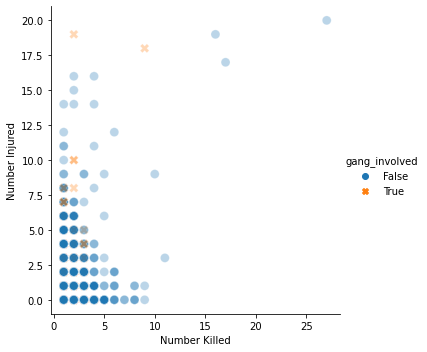

In [311]:
s2c_test_not_suicides_2 = s2c_test_not_suicides[s2c_test_not_suicides.n_killed.between(0,40)]
s2c_test_not_suicides_plot = sns.relplot(data=s2c_test_not_suicides_2, x="n_killed",
                                         y="n_injured",hue="gang_involved", style="gang_involved",
                                         s=80, alpha=0.3)

s2c_test_not_suicides_plot .set(xlabel="Number Killed", ylabel="Number Injured")

As seen above, relating deaths to injuries reveals that in mass shootings where fewer people are killed, more people are likely to be injured. It is interesting to note that shootings with higher injury to death ratios appear to be gang related, while other shootings seem to be generally more lethal. There was also one mass shooting that was removed as it showed over 50 victims had been killed or injured. Considering it was a distant outlier, I removed it to keep the histogram more compact.

<h3>Questions for Reviewers</h3>

What is our best strategy to mitigate categories that are unclear or are under reported (for example accidental suicides compared to intentional)?

What mediums would you recommend for presenting our data? (maps, graphs, etc)?

What other variables do you think we should take into consideration (even if they are not in our dataset)?